# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

# **Question 1. Explore the data**

In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [195]:
origin_df = pd.read_csv('/content/Mobile_Price_Data.csv')
origin_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2.0,0.8,106,6,...,1222,1890.0,668.0,13,4,19,1.0,1,0,0
1996,1965,1,2.6,1,0,0,39.0,0.2,187,4,...,915,1965.0,2032.0,11,10,16,1.0,1,1,2
1997,1911,0,0.9,1,1,1,36.0,0.7,108,8,...,868,1632.0,3057.0,9,1,5,1.0,1,0,3
1998,1512,0,0.9,0,4,1,46.0,0.1,145,5,...,336,670.0,869.0,18,10,19,1.0,1,1,0


In [196]:
print(len(origin_df))

2000


In [197]:
origin_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [198]:
origin_df.shape

(2000, 21)

In [199]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   float64
 18  touch_sc

# Clean data

**Check Null values**

In [200]:
origin_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64

**NaN value detection**

In [201]:
origin_df.isna().sum()
origin_df = origin_df.dropna()

**Duplicate values detection**

In [202]:
origin_df.duplicated().sum()

0

# **Question 2. Study the correlation**

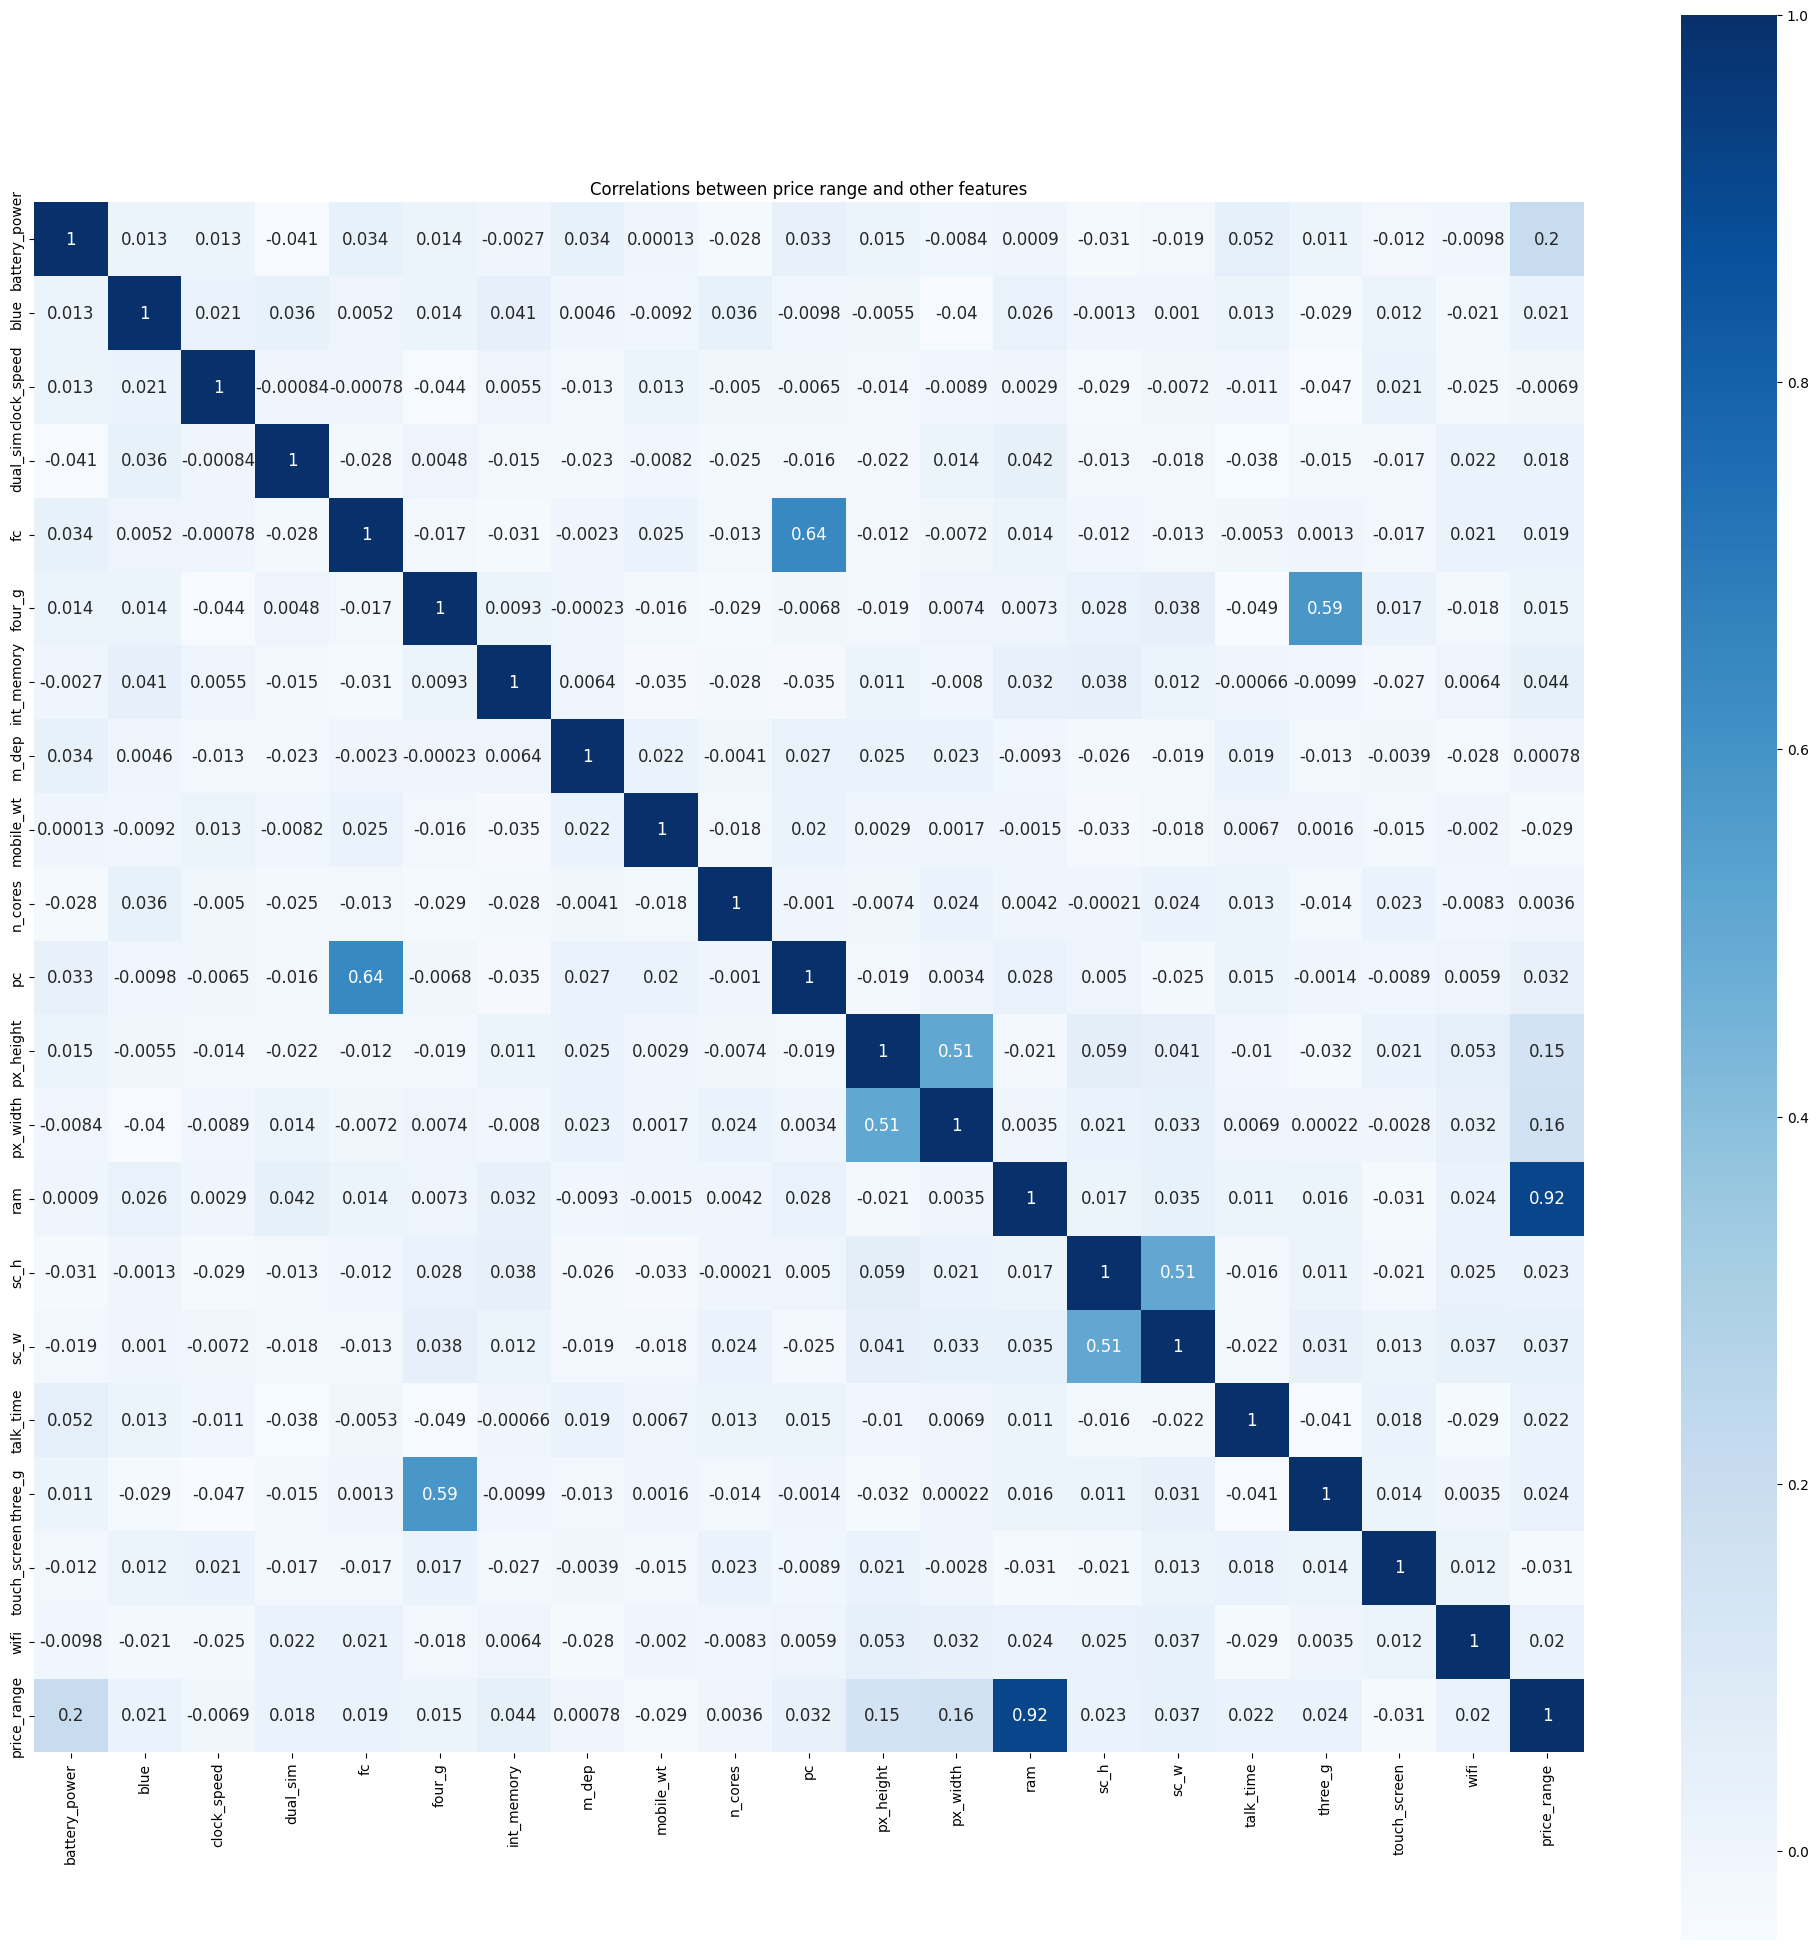

In [203]:
fig = plt.subplots (figsize = (25, 25))
sns.heatmap(origin_df.corr (), square = True, cbar = True, annot = True, cmap="Blues", annot_kws = {'size': 12})
plt.title('Correlations between price range and other features')
plt.xticks(rotation = 90)
plt.show ()

# **Analysis Correlation**

Based in the heatmap above:
* Ram has the strogest correlation with price range. The following is battery power with 0.2, px width with 0.17 and px height with 0.15.
* Most of other variables have weak correlation to price range.
* Primary camera mega pixels and front camera mega pixels, 3G and 4G are somewhat correlated, but they do not effect price range.
* There are some variables are negative which indicates a negative correlation from those with price range.

# **Question 3. Split the data set**

In [204]:
train_case, test_case = train_test_split(origin_df, test_size = 0.2, random_state = 142)
print('Train shape: ',train_case.shape)
print('Test shape: ',test_case.shape)

Train shape:  (1596, 21)
Test shape:  (399, 21)


# **Question 4. Train a logistic regression model to predict 'price range' based on the selected features. Calculate the accuracy of your model. Explain your model and evaluate its performance.**

In [205]:
X_train = train_case.drop('price_range',axis=1)
Y_train = train_case['price_range']

X_test = test_case.drop(['price_range'], axis = 1)
Y_test = test_case['price_range']

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

print(X_train.head())
print(Y_train.head())

X_train shape:  (1596, 20)
Y_train shape:  (1596,)
X_test shape:  (399, 20)
Y_test shape:  (399,)
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
60             1484     0          3.0         0   3       0        12.0   
731            1807     1          2.1         0   2       0        49.0   
99              593     0          0.5         0   6       0        31.0   
1878            608     1          0.5         1   0       0        64.0   
1718            637     1          0.8         1   2       0        28.0   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width     ram  sc_h  sc_w  \
60      0.6        134        3   5        916     969.0  1457.0    14     4   
731     0.8        125        1  10        337    1384.0  1906.0    17    13   
99      0.4        156        7   7       1233    1317.0  1692.0     6     2   
1878    0.9         94        4   0          4    1351.0  2517.0    16     8   
1718    0.6        194        4   6       108

In [206]:
#Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [207]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [208]:
#Calculate the accuracy of your model.
print("Accuracy score on training set: ", accuracy_score(Y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(Y_test, y_hat_test))

Accuracy score on training set:  0.6466165413533834
Accuracy score on testing set:  0.6040100250626567


In [209]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(Y_test, y_hat_test))

Confusion matrix on test set: 
[[69 23  0  0]
 [14 50 35 10]
 [ 1 20 48 33]
 [ 0  0 22 74]]


In [210]:
print("Confusion matrix on train set: ")
print(confusion_matrix(Y_train, y_hat_train))

Confusion matrix on train set: 
[[322  79   6   0]
 [ 72 208  85  24]
 [  0  78 195 124]
 [  0   5  91 307]]


# **Feature Selection**

In [218]:
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=1, step=1)
rfe.fit(X_train, Y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [211]:
#Doing evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(Y_test, y_test_hat))

accuracy score on test set:  0.6215538847117794


In [212]:
#Summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 5.000
Column: 1, Selected False, Rank: 11.000
Column: 2, Selected False, Rank: 4.000
Column: 3, Selected False, Rank: 7.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 10.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 12.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 2.000
Column: 12, Selected False, Rank: 3.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 6.000
Column: 18, Selected False, Rank: 8.000
Column: 19, Selected False, Rank: 9.000


In [222]:
#To increment number of features, one at each time
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, Y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(Y_test, y_pred)
    # print this
    print("Accuracy on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Accuracy on test set using 1 features:  0.2531328320802005
Accuracy on test set using 2 features:  0.24812030075187969
Accuracy on test set using 3 features:  0.23057644110275688
Accuracy on test set using 4 features:  0.22305764411027568
Accuracy on test set using 5 features:  0.23308270676691728
Accuracy on test set using 6 features:  0.23057644110275688
Accuracy on test set using 7 features:  0.2656641604010025
Accuracy on test set using 8 features:  0.2882205513784461
Accuracy on test set using 9 features:  0.6215538847117794


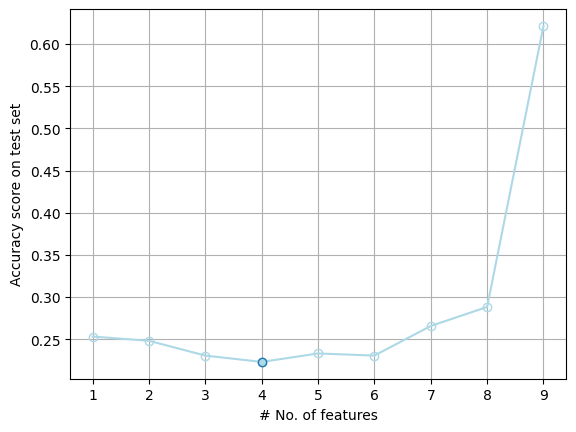

In [221]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 10):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(X_train, Y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(Y_test, predicted)
    acc_scores.append(acc_score)

best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 10), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

# **Question 5. Train a KNN model to predict 'price range' based on the selected features. Calculate the accuracy of your model.**

In [213]:
# Create and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, Y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.899749373433584


# **Question 6. Tune the hyper-parameter K in KNN and explain how K influences the prediction performance.**

In [214]:
from sklearn.model_selection import cross_val_score, KFold
parameter_grid = {'n_neighbors': range(1, 31)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(X_train, Y_train)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  11
The accuracy:  0.932323113207547


# Comparison

In [215]:
print("KNN Model Accuracy: ", clf.best_score_)
print("Logistic Regression Model Accuracy: ", accuracy)

KNN Model Accuracy:  0.932323113207547
Logistic Regression Model Accuracy:  0.899749373433584


(0.88, 0.95)

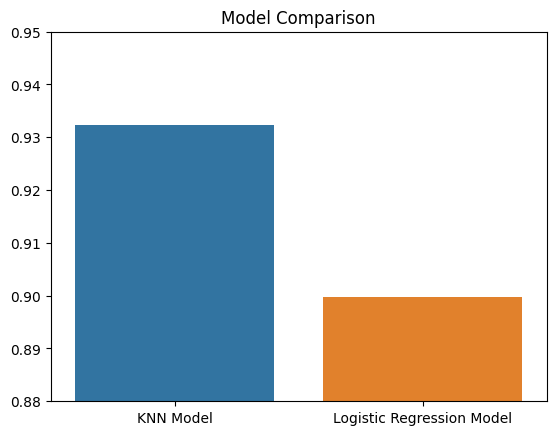

In [216]:
sns.barplot(x=['KNN Model', 'Logistic Regression Model'], y = [clf.best_score_, accuracy], palette = 'tab10').set(title = "Model Comparison")
plt.ylim(0.88,0.95)

Based on the accuracy of the 2 models, we can see that KNN Model gives a considerable more accurate result than Logistic Regression Model.